Load and Explore Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Check for Missing Values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


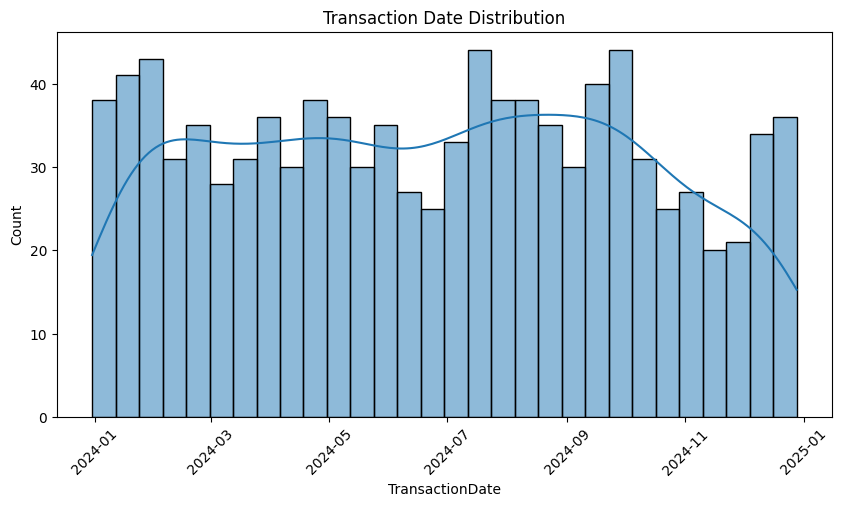

In [6]:
 # Data Visualizations Transaction Trend Over Time
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

plt.figure(figsize=(10, 5))
sns.histplot(transactions["TransactionDate"], bins=30, kde=True)
plt.title("Transaction Date Distribution")
plt.xticks(rotation=45)
plt.show()

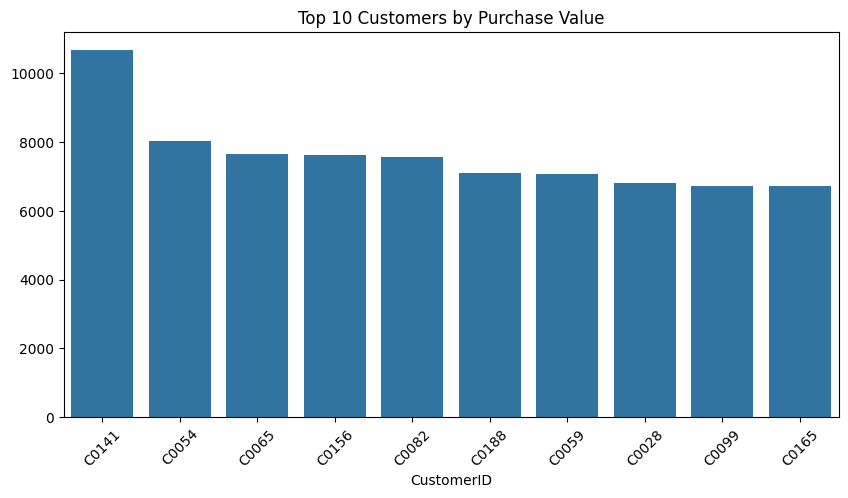

In [7]:
# Top 10 Customers by Purchase Value
top_customers = transactions.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Customers by Purchase Value")
plt.xticks(rotation=45)
plt.show()

In [8]:
merged_df = transactions.merge(products, on="ProductID")

# Calculate revenue per product category
category_revenue = merged_df.groupby("Category")["TotalValue"].sum().reset_index()

# Sort by revenue
category_revenue = category_revenue.sort_values(by="TotalValue", ascending=False)

# Display top categories
category_revenue.head(5)


,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


In [10]:
# Convert transaction date to datetime format
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Extract month
transactions["Month"] = transactions["TransactionDate"].dt.month

# Group by month
monthly_sales = transactions.groupby("Month")["TotalValue"].sum().reset_index()

# Display monthly sales
monthly_sales


,Month,TotalValue
0,1,66376.39
1,2,51459.27
2,3,47828.73
3,4,57519.06
4,5,64527.74
5,6,48771.18
6,7,71366.39
7,8,63436.74
8,9,70603.75
9,10,47063.22


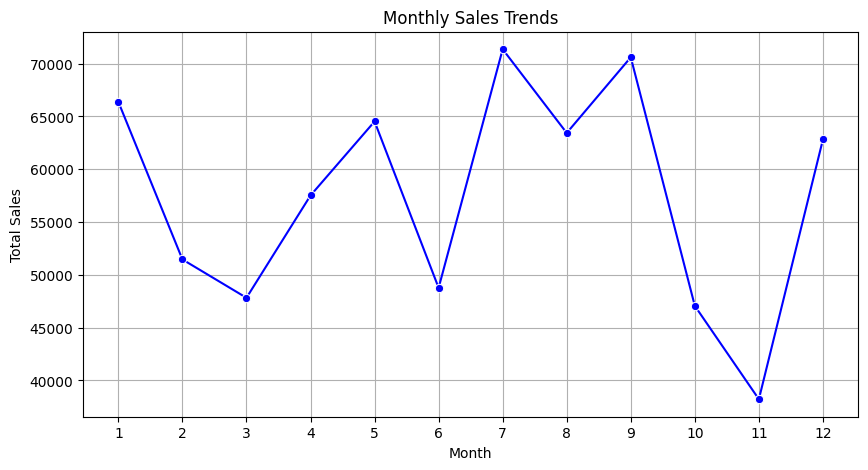

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="TotalValue", data=monthly_sales, marker="o", color="b")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid()
plt.show()

In [12]:
repeat_customers = transactions.groupby("CustomerID")["TransactionID"].count().reset_index()
repeat_customers.columns = ["CustomerID", "PurchaseCount"]

# Find percentage of customers with more than 1 purchase
repeat_percentage = (repeat_customers[repeat_customers["PurchaseCount"] > 1].shape[0] / repeat_customers.shape[0]) * 100

print(f"Percentage of customers with repeat purchases: {repeat_percentage:.2f}%")


Percentage of customers with repeat purchases: 93.97%


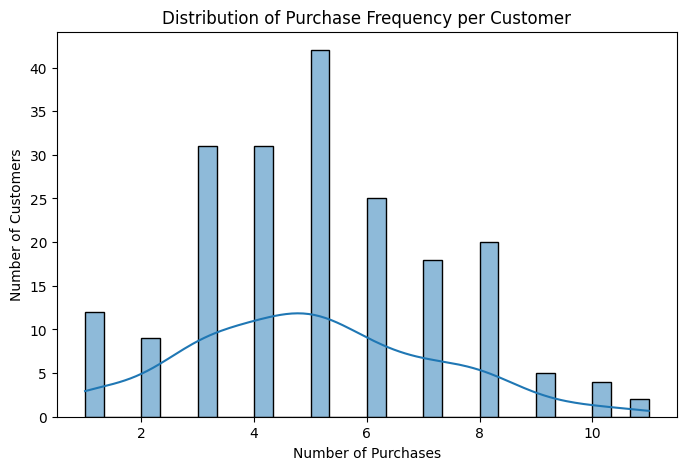

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(repeat_customers["PurchaseCount"], bins=30, kde=True)
plt.title("Distribution of Purchase Frequency per Customer")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()